In [54]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## **Loading the Data**

In [55]:
df = pd.read_excel("Online Retail.xlsx")

## **Understanding the Data**

In [56]:
# checking first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [57]:
# checking shape of the dataset
df.shape

(541909, 8)

#### **There are 541909 rows and 8 columns**

In [58]:
# Getting info about all columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [59]:
# Checking the summary of numerical columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [60]:
# Checking percentage of null values in each column
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

#### **Description and customerID has null values**

In [61]:
# checking for duplicate rows
df.duplicated().sum()

5268

#### **Performing some EDA for better understanding of data**


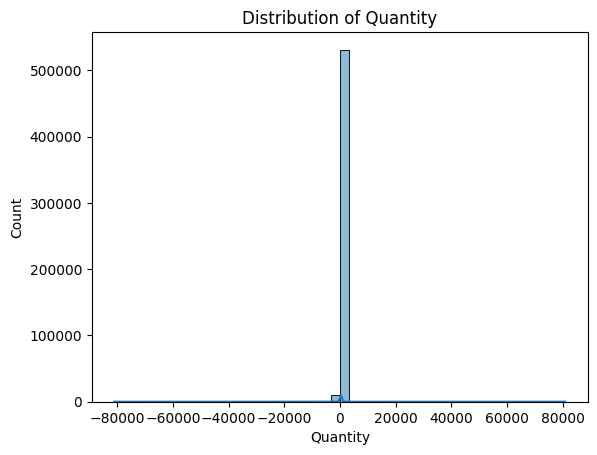

In [62]:
# Plot distribution of Quantity
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

- #### **The extremely high peak near zero suggests that most transactions involve small quantities. This could mean that most customers purchase items in low quantities.**
- #### **There are noticeable outliers on both sides of the zero mark, with quantities reaching both very high positive and very low negative values. Negative quantities might indicate returns or cancellations.**

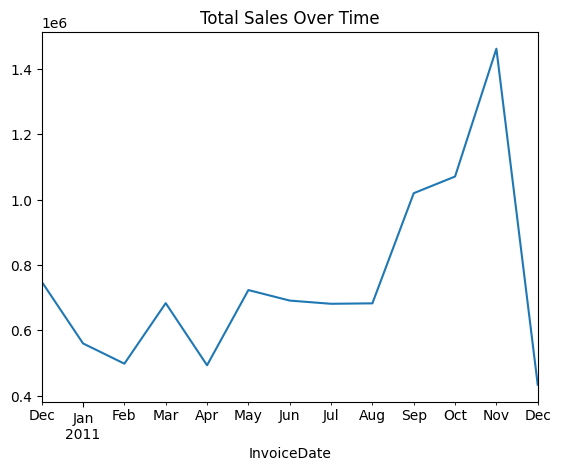

In [63]:
# Creating a new column for total sales

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Plot sales over time
df.set_index('InvoiceDate')['TotalSales'].resample('M').sum().plot()
plt.title('Total Sales Over Time')
plt.show()

- #### **Seasonal Trend: There is a noticeable increase in sales towards the end of the year, particularly in November. This is likely due to the holiday season when retail sales typically spike.**
- #### **Fluctuations: Sales exhibit fluctuations throughout the year, with some months showing dips and others showing peaks. This suggests variability in purchasing behavior over time, which could be influenced by various factors such as marketing campaigns, holidays, or other events.**

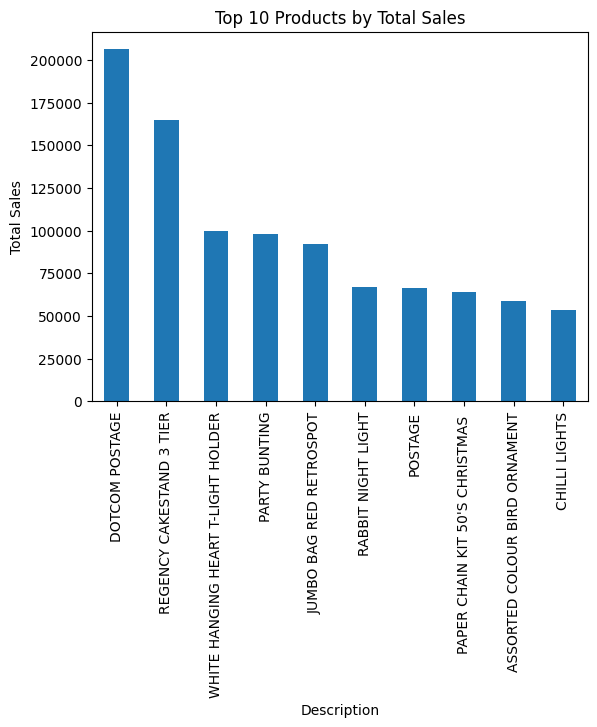

In [64]:
# Aggregate sales by product
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot top products
top_products.plot(kind='bar')
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales')
plt.show()

#### **Top Product: "DOTCOM POSTAGE" is the highest-grossing product, significantly outperforming other products.**

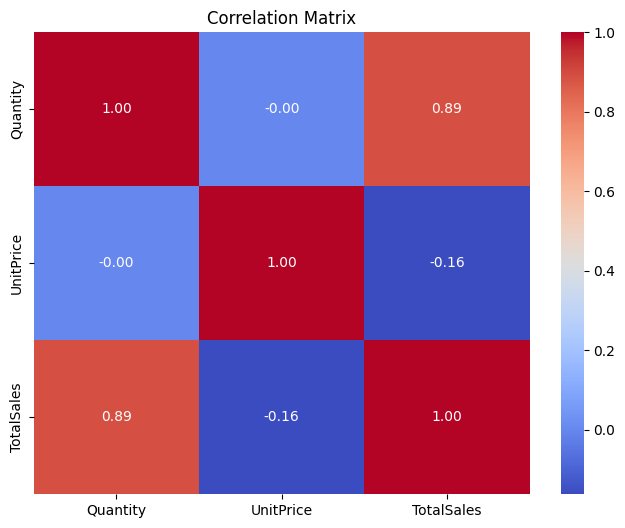

In [65]:
# Calculating the correlation matrix
correlation_matrix = df[['Quantity', 'UnitPrice', 'TotalSales']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Cleaning the data**

In [66]:
# Removing duplicated values
df = df.drop_duplicates(keep = 'first')

In [67]:
df.shape

(536641, 9)

#### **Now there are 536641 rows**

In [68]:
# drop all rows having missing values
df = df.dropna()

In [69]:
df.shape

(401604, 9)

In [70]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
dtype: int64

#### **Now,there are no null values in our dataset**

In [71]:
# changing the data-type of custimerID column from float to int
df["CustomerID"] = df["CustomerID"].astype(int)

In [72]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## **Transforming and feature Engineering the data**

In [73]:
# Creating new column: amount 
df['amount'] = df['Quantity']*df['UnitPrice']

In [74]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34


#### **Preparing the data for modelling**
- R (Recency): Number of days since last purchase
- F (Frequency): Number oftransactionss
- M (Monetary): Total amount of transactions (revenue contributed)

In [75]:
# monetary
grouped_df = df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [76]:
# frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [77]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [78]:
# Recency
# compute the max date
max_date = max(df['InvoiceDate']) 
max_date

Timestamp('2011-12-09 12:50:00')

In [79]:
# compute the diff
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,373 days 04:24:00


In [80]:
# recency
last_purchase = df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [81]:
# Merge the DataFrames
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325 days 02:33:00
1,12347,4310.00,182,1 days 20:58:00
2,12348,1797.24,31,74 days 23:37:00
3,12349,1757.55,73,18 days 02:59:00
4,12350,334.40,17,309 days 20:49:00


In [82]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


### Treating outliers
#### two types of outliers:
- #### statistical
- #### domain specific

In [83]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]


#### **No, we have Recency, frequency and monetary on which we will perform the modelling or segmentation**

In [84]:
# Performing rescaling on RFM columns

rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

# transforms to numpy array
rfm_df_scaled

array([[-0.72254177, -0.7508303 ,  2.30216587],
       [ 1.7352321 ,  1.05711173, -0.90615021],
       [ 0.30233283, -0.45955075, -0.18328887],
       ...,
       [-0.62183577, -0.64034496, -0.84673695],
       [ 0.44391999,  6.4708937 , -0.88634579],
       [ 0.3251656 , -0.06782998, -0.5001596 ]])

In [85]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731


### **We have now prepared the data for clustering analysis**

## **Modelling**

### **Finding the Optimal Number of Clusters**

#### SSD

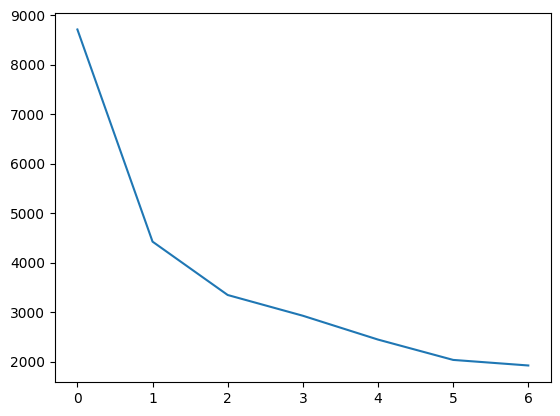

In [86]:
# elbow-curve/Sum of squared distances(SSD)
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [87]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4033970331550185
For n_clusters=3, the silhouette score is 0.5096377645583666
For n_clusters=4, the silhouette score is 0.48234533133685875
For n_clusters=5, the silhouette score is 0.41576935854163416
For n_clusters=6, the silhouette score is 0.4431287011228814
For n_clusters=7, the silhouette score is 0.41379620658327854
For n_clusters=8, the silhouette score is 0.3998109796993571


#### We find the silhouette score in Python and by analysing both the silhouette score and the elbow curve number of clusters should be 3.

In [88]:
# Making model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [89]:
kmeans.labels_

array([2, 1, 0, ..., 0, 1, 0])

In [90]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346,0.00,2,325,2
1,12347,4310.00,182,1,1
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,2


#### **Analysing the clusters**

<Axes: xlabel='cluster_id', ylabel='amount'>

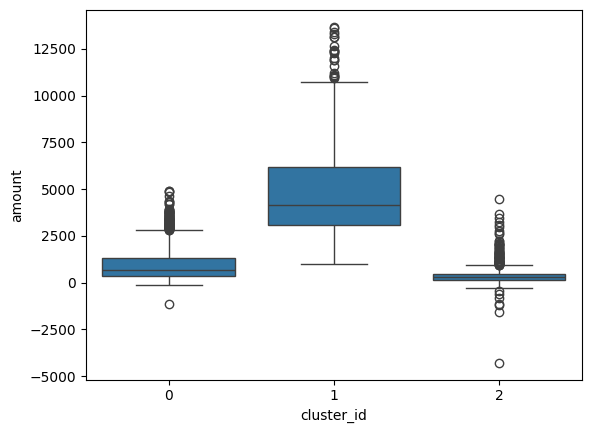

In [91]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)

#### **Customers in cluster_id 2 spend more money,hence they are valuable**

<Axes: xlabel='cluster_id', ylabel='recency'>

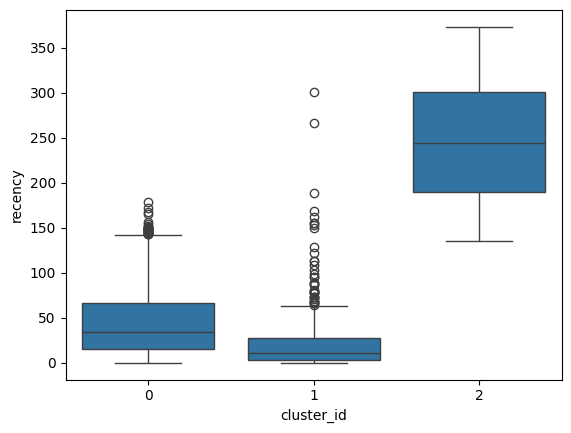

In [92]:
# plotting boxplot for recency 
sns.boxplot(x='cluster_id', y='recency', data=grouped_df)

#### **Customers in cluster_id 2 are the more recent customers**

<Axes: xlabel='cluster_id', ylabel='frequency'>

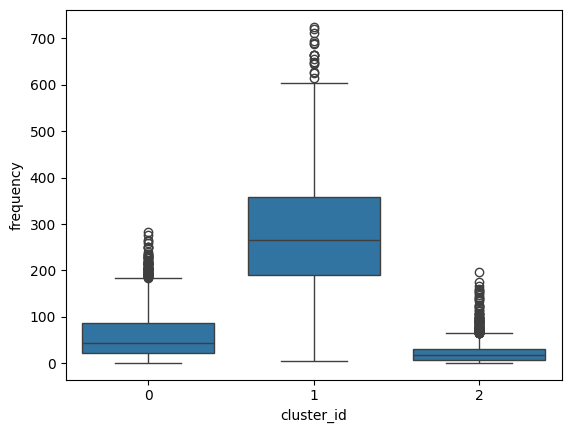

In [93]:
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)

#### **Customers in the cluster_id 2 are more frequent customers, therefore we can say that cluster 2 contains valuable customers**

### Visualising the clusters

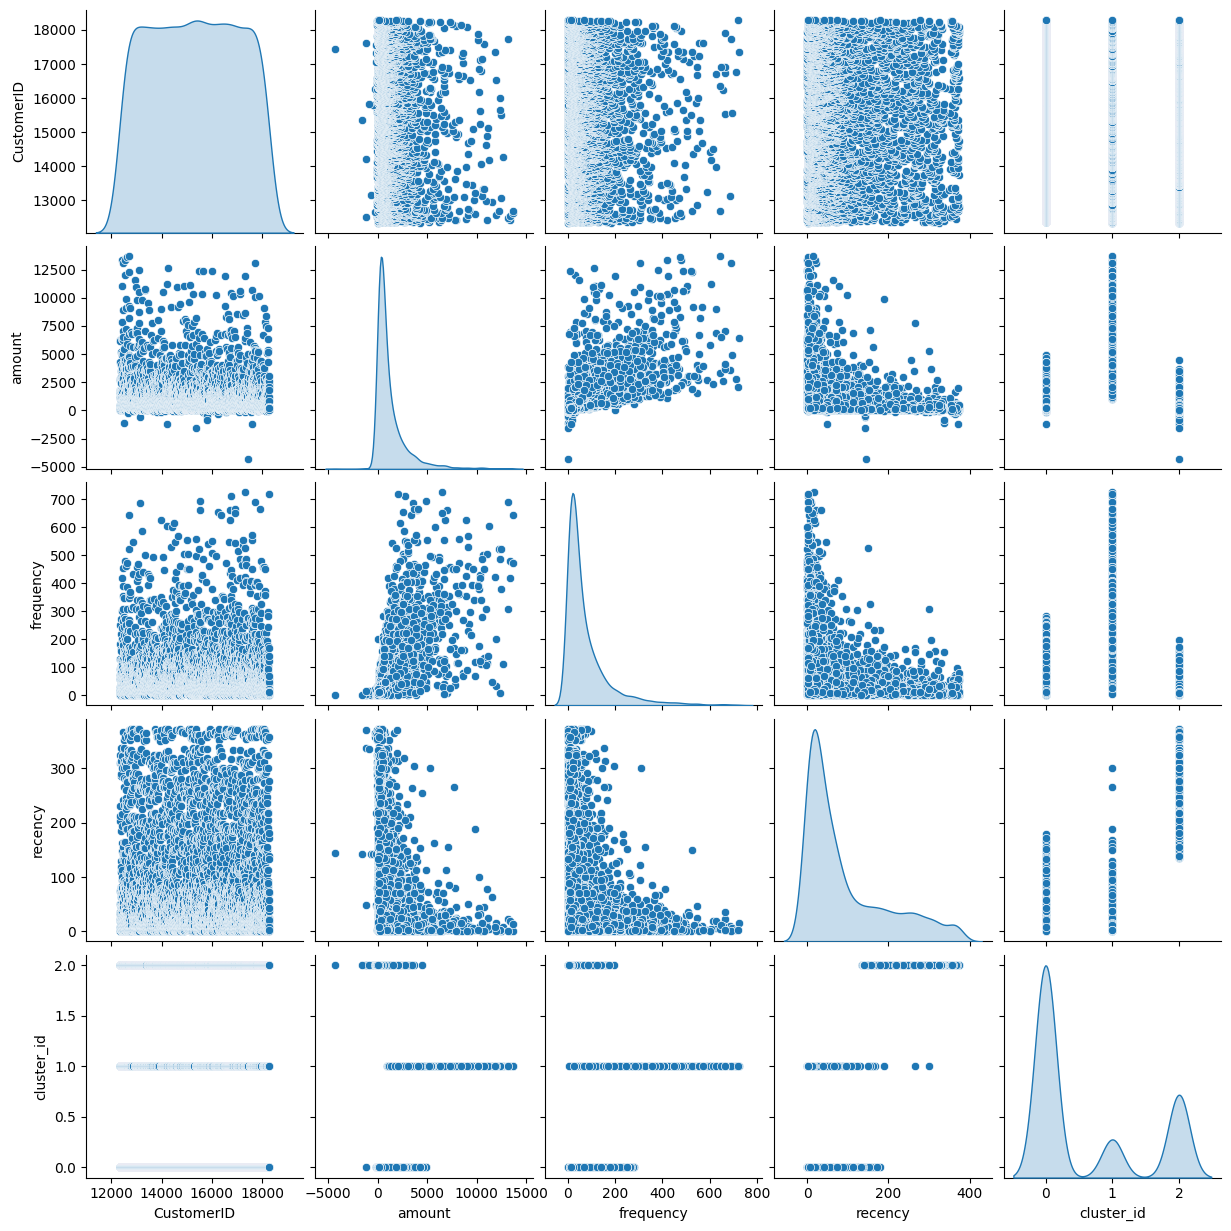

In [94]:
sns.pairplot( data=grouped_df, diag_kind='kde', palette='magma')

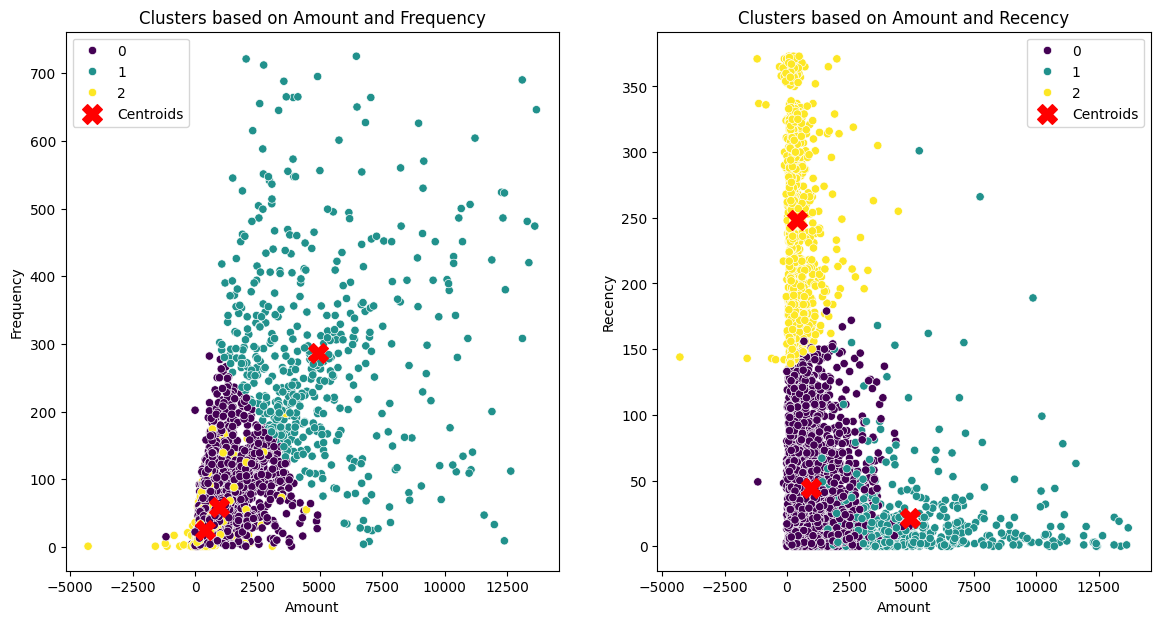

In [95]:
centroids_scaled = kmeans.cluster_centers_

# Inverse transform the centroids to get them in the original feature space
centroids = scaler.inverse_transform(centroids_scaled)
# Scatter plot to visualize clusters
plt.figure(figsize=(14, 7))

# Plot clusters based on amount and frequency
plt.subplot(1, 2, 1)
sns.scatterplot(data=grouped_df, x='amount', y='frequency', hue='cluster_id', palette='viridis')
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    marker='X', 
    s=200, 
    label='Centroids'
)
plt.title('Clusters based on Amount and Frequency')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()

# Plot clusters based on amount and recency
plt.subplot(1, 2, 2)
sns.scatterplot(data=grouped_df, x='amount', y='recency', hue='cluster_id', palette='viridis')
plt.scatter(
    centroids[:, 0], 
    centroids[:, 2], 
    c='red', 
    marker='X', 
    s=200, 
    label='Centroids'
)
plt.title('Clusters based on Amount and Recency')
plt.xlabel('Amount')
plt.ylabel('Recency')
plt.legend()

plt.show()

#### Assign Cluster Labels to the Original Data


In [96]:
# Merge the cluster labels back into the original dataset
merged_df = pd.merge(df, grouped_df[['CustomerID', 'cluster_id']], on='CustomerID', how='left')
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,amount,diff,cluster_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30,373 days 04:24:00,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,373 days 04:24:00,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00,373 days 04:24:00,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,373 days 04:24:00,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34,373 days 04:24:00,1.0


#### **Analyzing each segment**

In [97]:
# Group the DataFrame by cluster_id and calculate summary statistics
cluster_stats = grouped_df.groupby('cluster_id').agg({
    'amount': ['mean', 'median', 'std'],
    'frequency': ['mean', 'median', 'std'],
    'recency': ['mean', 'median', 'std']
})

# Round the values to 2 decimal places
cluster_stats_rounded = cluster_stats.round(2)

# Format the DataFrame for better readability
cluster_stats_formatted = cluster_stats_rounded.rename(columns={
    'amount': 'Amount',
    'frequency': 'Frequency',
    'recency': 'Recency'
})

# Displaying the formatted summary statistics
cluster_stats_formatted

Amount                   Frequency                Recency         \
               mean   median      std      mean median     std    mean median   
cluster_id                                                                      
0            951.04   688.60   810.75     59.21   44.0   49.86   44.38   34.0   
1           4933.95  4132.65  2652.58    286.23  265.0  140.87   21.90   11.0   
2            387.12   287.81   474.76     25.17   17.0   26.73  248.30  244.5   

                   
              std  
cluster_id         
0           37.01  
1           32.61  
2           67.26

In [98]:
# Calculate the absolute differences between clusters for mean, median, and std
mean_diff = cluster_stats.diff().abs().iloc[1:, ::3]
median_diff = cluster_stats.diff().abs().iloc[1:, 1::3]
std_diff = cluster_stats.diff().abs().iloc[1:, 2::3]

# Find the cluster with the maximum difference for mean, median, and std
max_mean_diff_cluster = mean_diff.idxmax().values[0]
max_median_diff_cluster = median_diff.idxmax().values[0]
max_std_diff_cluster = std_diff.idxmax().values[0]

# Display the clusters with maximum differences for mean, median, and std
print(f"Cluster with maximum mean difference: {max_mean_diff_cluster}")
print(f"Cluster with maximum median difference: {max_median_diff_cluster}")
print(f"Cluster with maximum std difference: {max_std_diff_cluster}")

Cluster with maximum mean difference: 2
Cluster with maximum median difference: 2
Cluster with maximum std difference: 2


#### **Profiling the Customer Segments**

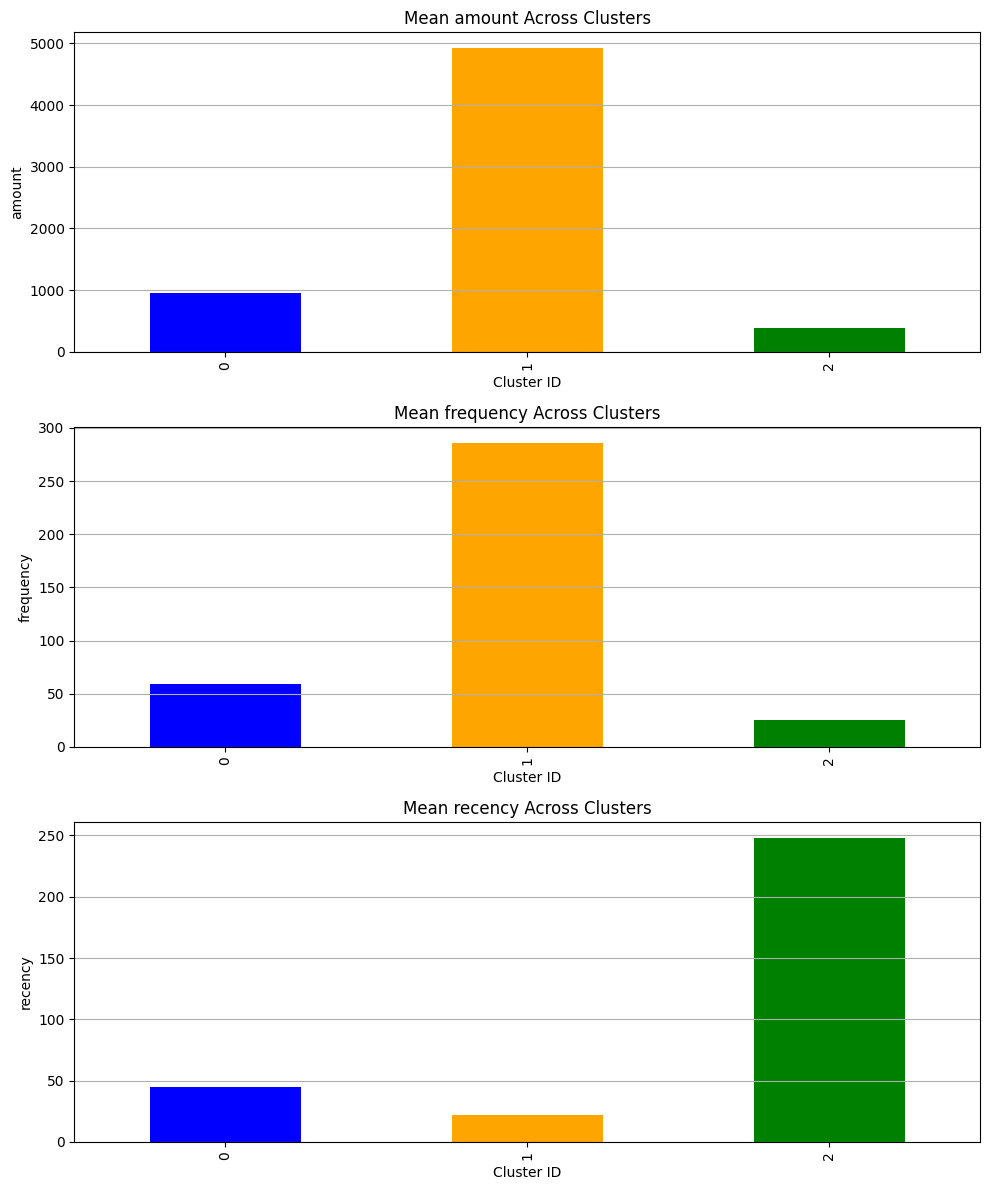

In [99]:
# Create profiles based on analysis
profiles = {
    'Segment 0': 'Low Amount, Low Frequency, High Recency',
    'Segment 1': 'Medium Amount, Medium Frequency, Medium Recency',
    'Segment 2': 'High Amount, High Frequency, Low Recency'
}

# Plot bar charts to compare mean values across clusters
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, column in enumerate(cluster_stats.columns.levels[0]):
    cluster_data = cluster_stats[column]['mean']
    cluster_data.plot(kind='bar', ax=axs[i], color=['blue', 'orange', 'green'])
    axs[i].set_title(f'Mean {column} Across Clusters')
    axs[i].set_xlabel('Cluster ID')
    axs[i].set_ylabel(column)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.show()